In [1]:
import clean_df
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import importlib
import warnings
import numpy as np
from pprint import pprint
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
importlib.reload(clean_df)

<module 'clean_df' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\Telecomm_data_analysis\\clean_df.py'>

In [3]:
df_original = pd.read_excel('Week1_challenge_data_source.xlsx',
                            dtype={'Bearer Id': str, 'IMSI': str,'MSISDN/Number': str, 'IMEI': str,
                                  'Handset Manufacturer':str,'Handset Type':str}, engine='openpyxl')

In [5]:
df=df_original.copy(deep=True)

In [6]:
cleaning_df=clean_df.CleanDataframe(df)

In [7]:
print(df.shape)

(150001, 55)


In [8]:
df.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                                object
MSISDN/Number                                       object
IMEI                                                object
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [9]:
df.describe().iloc[1:]

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
mean,499.188200,498.800880,1.046086e+05,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,45.000000,5.000000,63.000000,63.000000,5.687300e+05,2.094950e+04,100.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,70.000000,15.000000,19710.750000,1120.000000,3.768308e+06,8.402025e+04,100.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


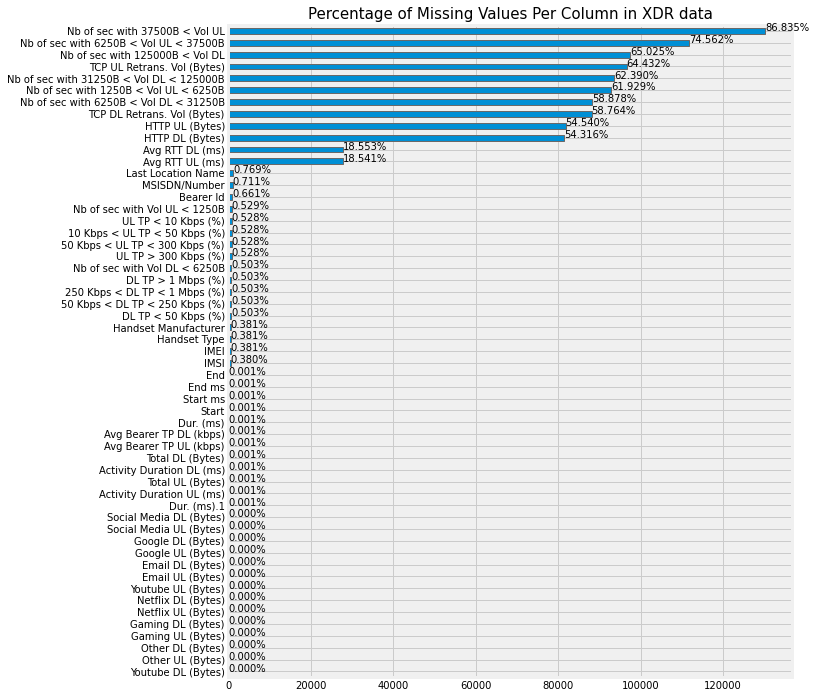

In [10]:
cleaning_df.check_missing_values()

In [11]:
bytes_data = ['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                'Email DL (Bytes)', 'Email UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)',
              'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
              'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

In [12]:
# !! Run it once
df=cleaning_df.convert_bytes_to_megabytes(bytes_data)

In [13]:
#Change millsecond to Seconds
df['Dur. (ms)']=df['Dur. (ms)']/1000
df.rename(columns={'Dur. (ms)':'Dur. (s)'},inplace=True)

In [14]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823.652,208201448079117,33664962239,35521209507511,9164566995485190,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365.104,208201909211140,33681854413,35794009006359,L77566A,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361.762,208200314458056,33760627129,35281510359387,D42335A,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321.509,208201402342131,33750343200,35356610164913,T21824A,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089.009,208201401415120,33699795932,35407009745539,D88865A,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


**Remove columns with >25% Missing values and irrelevant columns**

In [15]:
df=cleaning_df.drop_unwanted_columns()

**Drop some data**

Because we are interested in xDR sessions, it is important to allocate the session to  certain user and as we can’t statistically impute the  MSISDN (“MSISDN/Number”),  We will drop these data.

Moreover a user with no any of **'IMEI','IMSI','MSISDN/Number'** can not be identified hence dropped as well

In [16]:
df.dropna(how='all',subset=['IMEI','IMSI','MSISDN/Number'],inplace=True)

In [17]:
df.shape #149431

(149431, 44)

In [18]:
df.isna().sum()

Bearer Id                           430
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (s)                              0
IMSI                                  0
MSISDN/Number                       496
IMEI                                  2
Last Location Name                  592
Avg RTT DL (ms)                   27693
Avg RTT UL (ms)                   27675
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 724
50 Kbps < DL TP < 250 Kbps (%)      724
250 Kbps < DL TP < 1 Mbps (%)       724
DL TP > 1 Mbps (%)                  724
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Handset Manufacturer                  2


In [19]:
# xDR with "IMEI" missing , also has "no MSISDN/Number"
#xDR with no "Bearer Id" , also has "no Last Location Name" 

df[df['IMEI'].isnull() & df['MSISDN/Number'].isnull()]

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
58263,6917537689702479872,2019-04-25 23:05:05,714.0,2019-04-26 23:11:28,12.0,86.782,208209502714942,NaN,NaN,U74261B,...,1.215176,6.041132,1.418313,5.665048,596.717529,8.854054,642.690544,11.469281,34.369618,611.874376
79882,6917537694121520128,2019-04-27 07:44:50,593.0,2019-04-27 23:11:06,529.0,55.575,208209502746727,NaN,NaN,W21110C,...,17.202372,21.288822,19.270040,3.265093,62.871774,11.659446,618.554992,15.807139,55.218094,106.751651


In [20]:
# separating columns based on datatypes
cols_numeric=df.columns.difference(['Bearer Id','Start','End','IMSI','MSISDN/Number','IMEI','Last Location Name',
                                    'Handset Manufacturer','Handset Type']).to_list()
cols_cat=['Handset Manufacturer','Handset Type']

In [21]:
#Filling in missing values using mean value or median value depending on the previous histogram and skeweness
df=cleaning_df.fill_missing_values(cols_numeric,cols_cat)

In [22]:
df.isna().sum()

Bearer Id                         430
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (s)                            0
IMSI                                0
MSISDN/Number                     496
IMEI                                2
Last Location Name                592
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
50 Kbps < UL TP < 300 Kbps (%)      0
UL TP > 300 Kbps (%)                0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Handset Manufacturer                0
Handset Type                        0
Nb of sec wi

**Impute MSISDN Based on IMSI value**

In [23]:
# MSISDN/Number fixing
# Impute MSISDN based on same IMSI number, if it's not available, then we can drop thta missing MSISDN 
def impute_msisn(df,ids_dict):
    df['MSISDN/Number_new']=df['IMSI'].apply(lambda x: ids_dict[x] if x in ids_dict.keys() else np.nan)
    return df

In [24]:
df_same=df[df['MSISDN/Number'].isna()]
df_same=df_same.merge(df,how='left',on='IMSI')[['IMSI','MSISDN/Number_x','MSISDN/Number_y']]
df_same=df_same[df_same['MSISDN/Number_y'].notna()]

# New MSIDN/Number based on device IMEI
ids_dict=dict(df_same[['IMSI','MSISDN/Number_y']].to_dict('split')['data'])

In [25]:
df_missing=df[['IMSI','MSISDN/Number']][df['MSISDN/Number'].isna()]

In [26]:
df_impute=impute_msisn(df_missing,ids_dict)

In [27]:
for row in df_impute.index:
    df['MSISDN/Number'].loc[row]=df_impute['MSISDN/Number_new'].loc[row]

Remaining data with no ID can be dropped for now

In [28]:
df.dropna(subset=['MSISDN/Number'],inplace=True)

**Check the skewness before ploting histogram (No need to plot Normally Distributed variables)**

In [29]:
print('Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted and <-1 skewed to negative')
df.skew(axis=0,numeric_only=True)

Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted and <-1 skewed to negative


Start ms                           0.000632
End ms                            -0.000701
Dur. (s)                           3.961078
Avg RTT DL (ms)                   71.321312
Avg RTT UL (ms)                   31.547323
Avg Bearer TP DL (kbps)            2.590430
Avg Bearer TP UL (kbps)            4.501023
DL TP < 50 Kbps (%)               -2.308024
50 Kbps < DL TP < 250 Kbps (%)     3.285285
250 Kbps < DL TP < 1 Mbps (%)      4.586684
DL TP > 1 Mbps (%)                 5.378427
UL TP < 10 Kbps (%)               -9.015901
10 Kbps < UL TP < 50 Kbps (%)     10.984442
50 Kbps < UL TP < 300 Kbps (%)    21.947388
UL TP > 300 Kbps (%)              36.213121
Activity Duration DL (ms)          5.861497
Activity Duration UL (ms)          7.368674
Nb of sec with Vol DL < 6250B      9.054026
Nb of sec with Vol UL < 1250B      7.509040
Social Media DL (Bytes)           -0.001818
Social Media UL (Bytes)            0.000069
Google DL (Bytes)                 -0.008457
Google UL (Bytes)               

In [30]:
cols_hist=set(cols_numeric)-set(bytes_data)-set(['Start ms', 'End ms'])

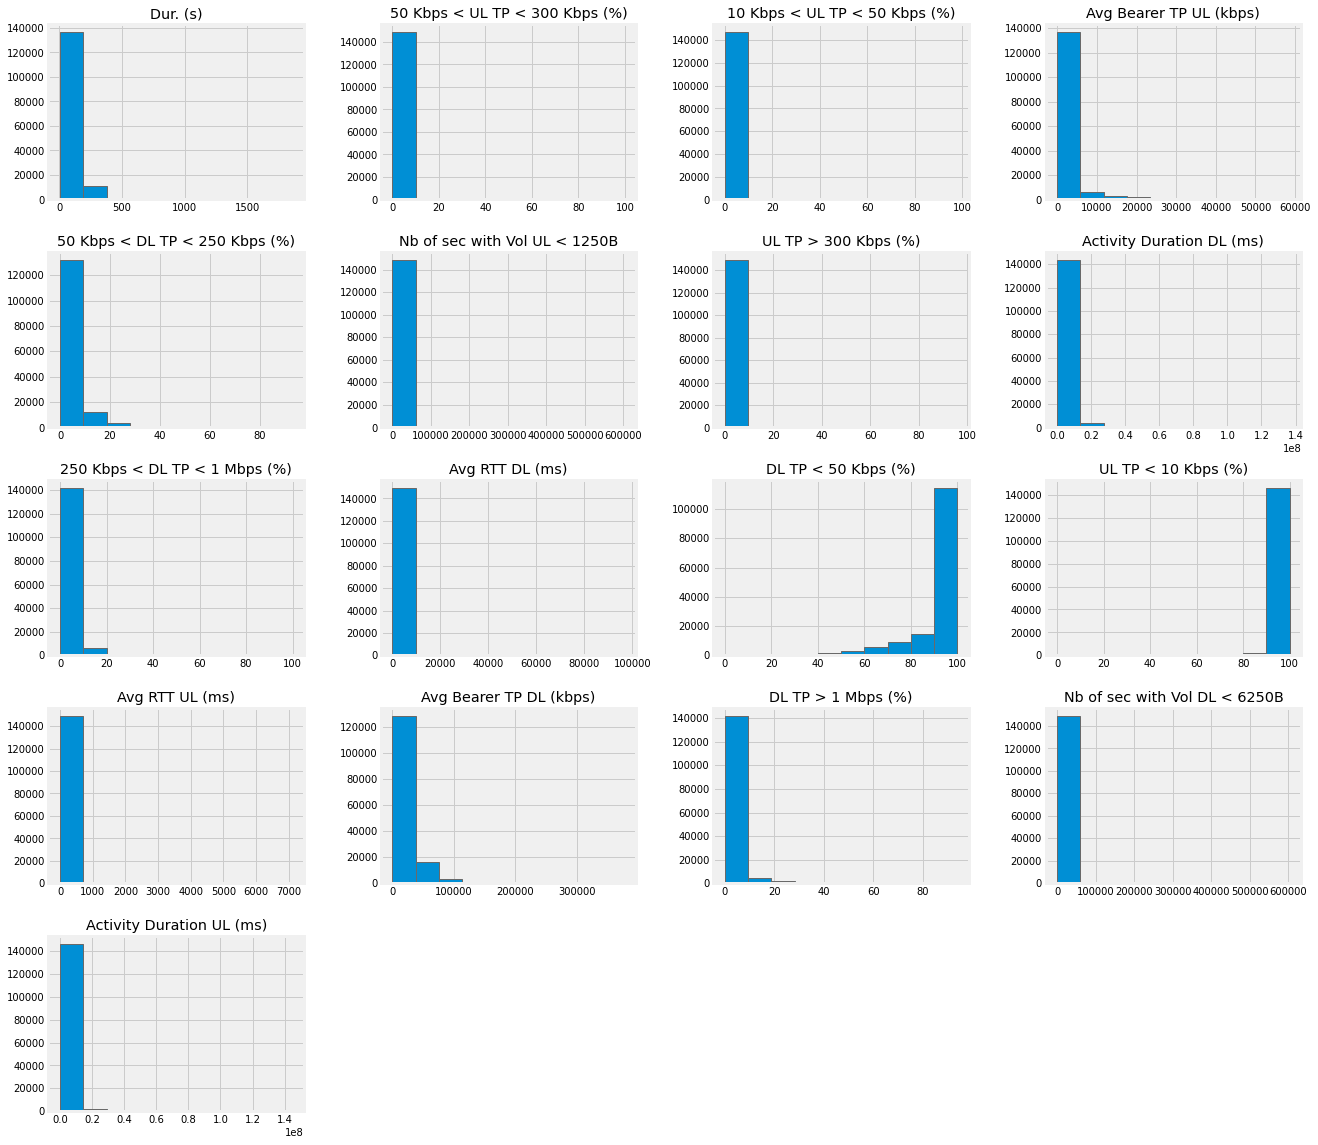

In [30]:
#Distribution of numeric variables
_=df[cols_hist].hist(figsize=(20,20))

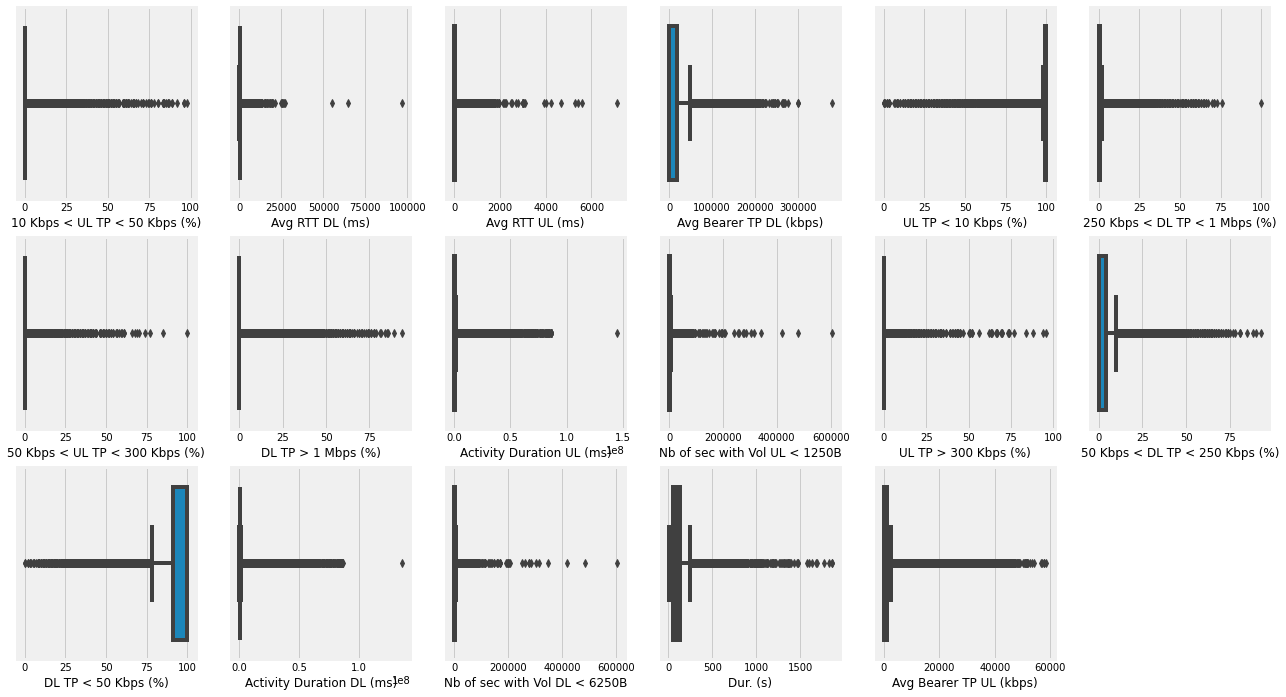

In [31]:
fig, axs = plt.subplots(3, 6,figsize=(20,12))
axe = axs.ravel()
for i, var in enumerate(cols_hist):
    sns.boxplot(x=var,data=df,ax=axe[i])
    
gl = len(cols_hist)
for i in range(18 - gl):
    fig.delaxes(ax=axe[gl + i])

**Remove Outliers, any value below .05 and above .95 Quartiles**

In [32]:
#Find the outliers

def outlier_bound(df,cols_use=cols_numeric):
    bounds={}
    for col in cols_use:
        q1=df[col].quantile(0.05)  #0.05
        q3=df[col].quantile(0.95)   #0.95
        lower_b=q1-(1.5*(q3-q1))
        upper_b=q3+(1.5*(q3-q1))
        bounds[col]=[lower_b,upper_b]
    return bounds

In [33]:
#Replace the outliers with mean value This helps with the computational analysis.

def outlier_remove(df,cols_use=cols_numeric):
    bounds=outlier_bound(df,cols_use)
    for col in cols_use:
        mean_use=df[col][(df[col] > bounds[col][0]) & (df[col] < bounds[col][1])].mean()
        df[col].where((df[col]>bounds[col][0])&(df[col]<bounds[col][1]),mean_use,inplace=True)
    return df

In [34]:
df=outlier_remove(df)

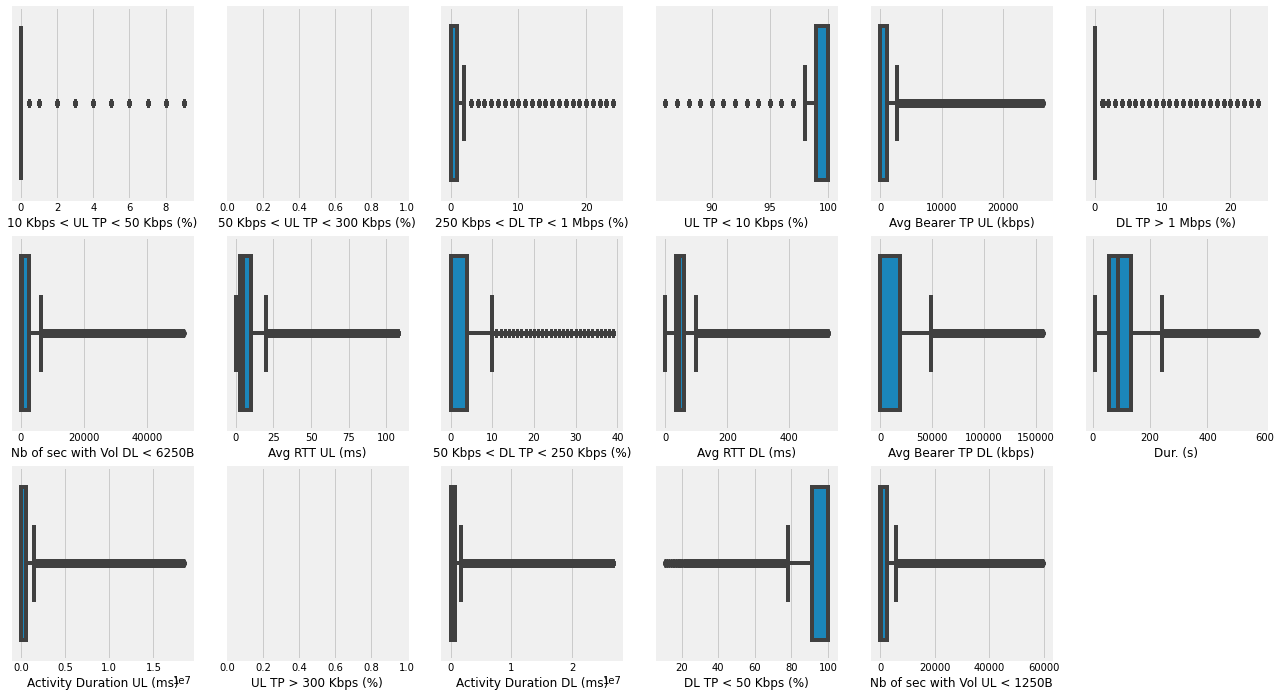

In [35]:
fig, axs = plt.subplots(3, 6,figsize=(20,12))
axe = axs.ravel()
for i, var in enumerate(cols_hist):
    sns.boxplot(x=var,data=df,ax=axe[i])
    
gl = len(cols_hist)
for i in range(18 - gl):
    fig.delaxes(ax=axe[gl + i])

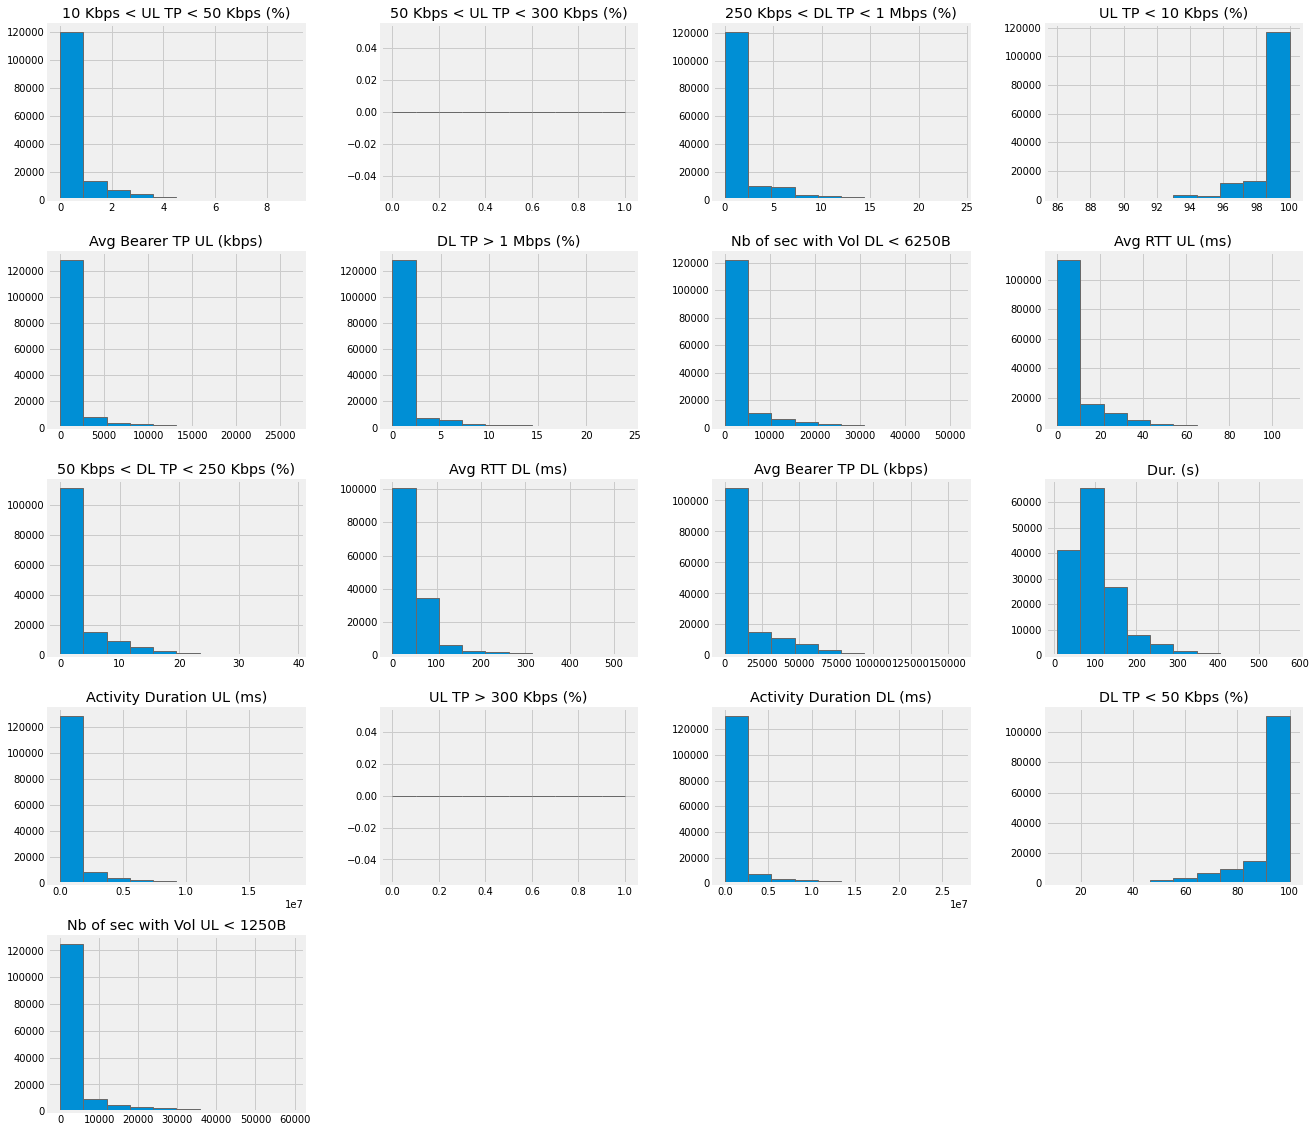

In [36]:
_=df[cols_hist].hist(figsize=(20,20))

In [35]:
# remove two columns that are dominantly zero
df.drop(['50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)'],axis=1,inplace=True)

In [36]:
cols_numeric.remove('UL TP > 300 Kbps (%)')
cols_numeric.remove('50 Kbps < UL TP < 300 Kbps (%)')

In [37]:
print('Skewness of the data per column after removing outliers: \n>0 being skewed to right'
      '\n0 normally distrbuted \n<-1 skewed to negative')
df.skew(axis=0,numeric_only=True)

Skewness of the data per column after removing outliers: 
>0 being skewed to right
0 normally distrbuted 
<-1 skewed to negative


Start ms                          0.000632
End ms                           -0.000701
Dur. (s)                          1.859640
Avg RTT DL (ms)                   4.011788
Avg RTT UL (ms)                   3.062520
Avg Bearer TP DL (kbps)           2.212953
Avg Bearer TP UL (kbps)           3.705908
DL TP < 50 Kbps (%)              -2.286702
50 Kbps < DL TP < 250 Kbps (%)    2.603405
250 Kbps < DL TP < 1 Mbps (%)     3.003889
DL TP > 1 Mbps (%)                3.693263
UL TP < 10 Kbps (%)              -3.104874
10 Kbps < UL TP < 50 Kbps (%)     3.669239
Activity Duration DL (ms)         3.937317
Activity Duration UL (ms)         3.892541
Nb of sec with Vol DL < 6250B     3.082359
Nb of sec with Vol UL < 1250B     3.309884
Social Media DL (Bytes)          -0.001818
Social Media UL (Bytes)           0.000069
Google DL (Bytes)                -0.008457
Google UL (Bytes)                 0.002474
Email DL (Bytes)                 -0.002476
Email UL (Bytes)                  0.007131
Youtube DL 

**Fix the string types and capitalize them**

In [38]:
df=cleaning_df.fix_data_types()

In [39]:
#Find total data volume for each application
df['Total Data (megabytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df['Social Media Total (megabytes)'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Email Total (megabytes)'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Google Total (megabytes)'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Youtube Total (megabytes)'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix Total (megabytes)'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming Total (megabytes)'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other Total (megabytes)'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

### !!!! Final DF to Deploy to DBase !!!!

In [40]:
# df.to_excel("Week1_challenge_data_cleaned.xlsx")
# df.columns.difference(['IMSI', 'IMEI', 'Start', 'Start ms', 'End', 'End ms', 'Last Location Name'])

In [41]:
# df.dtypes

## !!!! 

## Task 1

#### Top 10 handsets used by the customers and  Top 3 handset manufacturers

In [42]:
plt.style.use('seaborn-dark-palette')

In [53]:
pd.DataFrame(df.query('`Handset Manufacturer`!="Undefined"')['Handset Manufacturer'].value_counts()[:3])

,Handset Manufacturer
Apple,59471
Samsung,40633
Huawei,34370


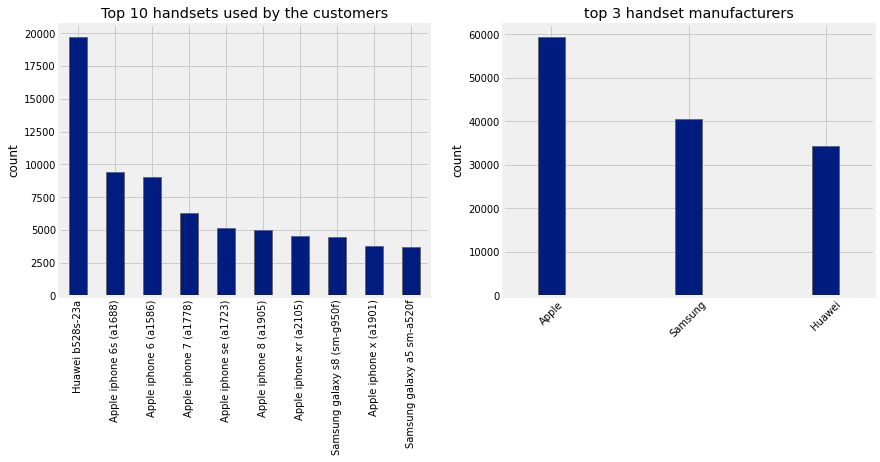

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
_ = df.query('`Handset Type`!="Undefined"')['Handset Type'].value_counts()[:10].plot(kind='bar', ylabel='count', rot=90,
                                                                                     ax=axs[0],
                                                                                     title='Top 10 handsets used by '
                                                                                           'the customers')
_ = df.query('`Handset Manufacturer`!="Undefined"')['Handset Manufacturer'].value_counts()[:3].plot(kind='bar',ylabel='count',rot=45,width=0.2,
                                                                            ax=axs[1],title='top 3 handset manufacturers')

#### top 5 handsets per top 3 handset manufacturer

In [44]:
df_manfact_goup=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung"\
                           or `Handset Manufacturer`=="Huawei"')

In [45]:
df_manfact_goup=df_manfact_goup.groupby(['Handset Manufacturer','Handset Type']).aggregate({'Handset Type':'count'})
pd.DataFrame(df_manfact_goup['Handset Type'].groupby('Handset Manufacturer',group_keys=False).nlargest(5))

Handset Type
Handset Manufacturer Handset Type                                
Apple                Apple iphone 6s (a1688)                 9413
                     Apple iphone 6 (a1586)                  9012
                     Apple iphone 7 (a1778)                  6304
                     Apple iphone se (a1723)                 5177
                     Apple iphone 8 (a1905)                  4986
Huawei               Huawei b528s-23a                       19728
                     Huawei e5180                            2075
                     Huawei p20 lite huawei nova 3e          2018
                     Huawei p20                              1479
                     Huawei y6 2018                           997
Samsung              Samsung galaxy s8 (sm-g950f)            4489
                     Samsung galaxy a5 sm-a520f              3711
                     Samsung galaxy j5 (sm-j530)             3684
                     Samsung galaxy j3 (sm-j330)             3467
                     Samsung galaxy s7 (sm-g930x)            3180

## Interim Submission

### 1.1

In [46]:
df_grouped_bytesdata = df.groupby('MSISDN/Number').aggregate({'Bearer Id':'count','Dur. (s)': 'sum', 'Total UL (Bytes)': 'sum',
                                                          'Total DL (Bytes)': 'sum','Total Data (megabytes)':'sum',
                                                          'Social Media Total (megabytes)': 'sum',
                                                          'Email Total (megabytes)': 'sum',
                                                          'Google Total (megabytes)': 'sum',
                                                          'Youtube Total (megabytes)': 'sum',
                                                          'Netflix Total (megabytes)': 'sum',
                                                          'Gaming Total (megabytes)': 'sum',
                                                          'Other Total (megabytes)': 'sum', 'IMEI': 'count',
                                                          'IMSI': 'nunique','Handset Manufacturer': 'unique'})

In [47]:
df_grouped_bytesdata.rename(columns={'Bearer Id':'xDR sessions'},inplace=True)

In [48]:
df_grouped_bytesdata['Handset Manufacturer'] = df_grouped_bytesdata['Handset Manufacturer'].apply(lambda x: x[0])

In [49]:
df_grouped_bytesdata

,xDR sessions,Dur. (s),Total UL (Bytes),Total DL (Bytes),Total Data (megabytes),Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes),IMEI,IMSI,Handset Manufacturer
MSISDN/Number,,,,,,,,,,,,,,,
3197020876596,1,102.595596,37.295915,194.828056,232.123971,0.715224,1.520771,10.438660,11.959905,26.592300,178.048738,470.526473,1,1,Quectel wireless solutions co ltd
33601001722,1,116.720000,36.053108,842.637466,878.690574,2.232135,1.331362,4.389005,21.624548,27.180981,812.458661,386.570872,1,1,Huawei
33601001754,1,181.230000,36.104459,120.755184,156.859643,2.660565,3.307781,5.334863,12.432223,11.221763,119.750078,281.710071,1,1,Apple
33601002511,1,134.969000,39.306820,556.659663,595.966483,3.195623,3.205380,3.443126,21.333570,19.353900,538.827713,501.693672,1,1,Undefined
33601007832,1,49.878000,20.327526,401.993172,422.320698,0.280294,2.284670,9.678493,6.977321,1.942092,391.126127,35.279702,1,1,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33789967113,1,160.461000,34.066711,174.056356,208.123067,1.413370,3.396607,9.892882,28.226479,30.370302,134.815919,408.107210,1,1,Apple
33789980299,2,210.389000,70.831420,1023.861966,1094.693386,4.250312,5.315327,10.246473,38.012812,51.950311,972.344996,1075.140407,2,1,Undefined
33789996170,1,8.810000,26.716429,687.925212,714.641641,0.300183,1.006915,7.531269,26.647843,14.902538,660.361359,295.282817,1,1,Huawei


In [50]:
df_grouped_bytesdata.describe().loc[['min','max','mean','25%','50%','75%']]

,xDR sessions,Dur. (s),Total UL (Bytes),Total DL (Bytes),Total Data (megabytes),Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes),IMEI,IMSI
min,0.00000,7.142000,2.866892,8.827082,33.249009,0.001563,0.018176,0.040330,0.078903,0.184569,0.306358,0.149045,1.000000,1.0
max,18.00000,4314.187575,729.577380,8156.743493,8846.226494,43.374779,42.418782,152.191852,452.958769,399.519079,7749.432234,8167.877776,18.000000,1.0
mean,1.39046,143.066974,57.337885,633.970863,691.308749,2.549338,3.150290,10.887449,31.573500,31.553970,600.071500,598.806918,1.394475,1.0
25%,1.00000,71.333500,36.400323,314.961591,358.714039,1.211634,1.674907,5.944465,18.634247,18.561149,288.196561,285.674928,1.000000,1.0
50%,1.00000,102.595596,46.806562,570.570248,618.186939,2.304647,2.800420,9.589778,26.805471,26.724001,542.534181,540.007963,1.000000,1.0
75%,2.00000,172.799000,65.801020,807.521280,857.720636,3.308711,3.848579,13.221139,37.943150,37.991091,777.537535,775.532485,2.000000,1.0


### 1.2

In [51]:
dist_cols=df_grouped_bytesdata.columns.difference(['Other Total (megabytes)',
                                                   'IMEI','IMSI','MSISDN/Number','Handset Manufacturer'])

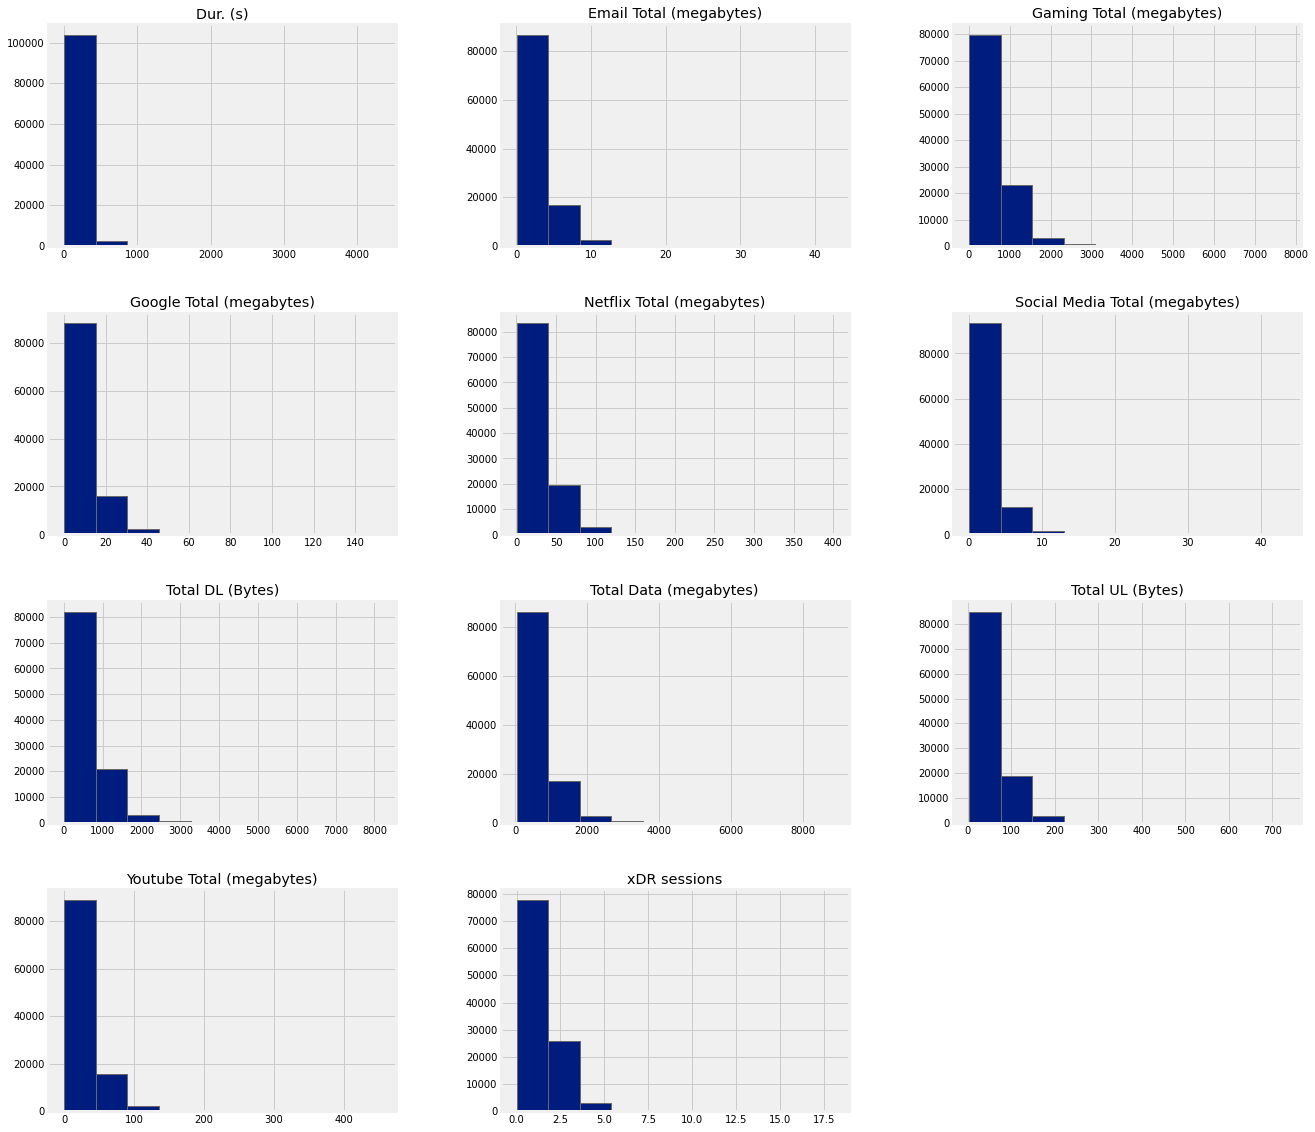

In [52]:
_=df_grouped_bytesdata[dist_cols].hist(figsize=(20,20))

## 3

In [53]:
app_cols=set(dist_cols)-set(['xDR sessions','Dur. (s)','Total DL (Bytes)','Total UL (Bytes)','Total Data (megabytes)'])
apps_usage=df_grouped_bytesdata[app_cols].aggregate(['sum'])

In [54]:
apps_usage

,Google Total (megabytes),Netflix Total (megabytes),Youtube Total (megabytes),Email Total (megabytes),Gaming Total (megabytes),Social Media Total (megabytes)
sum,1.163389e+06,3.371731e+06,3.373818e+06,336627.36208,6.412124e+07,272412.111325


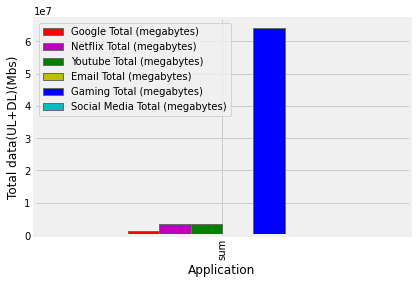

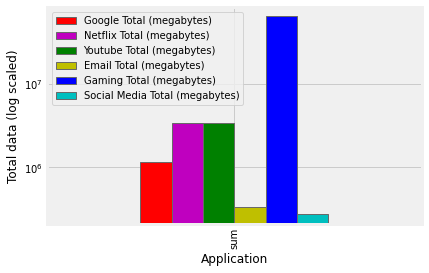

In [55]:
_=apps_usage.plot(kind='bar',color=['r','m','g','y','b','c'],xlabel='Application',ylabel='Total data(UL+DL)(Mbs)')
_=apps_usage.plot(kind='bar',color=['r','m','g','y','b','c'],logy=True,
                               xlabel='Application',ylabel='Total data (log scaled)')

In [56]:
df_grouped_bytesdata.shape

(106856, 15)

!!!Pair plot

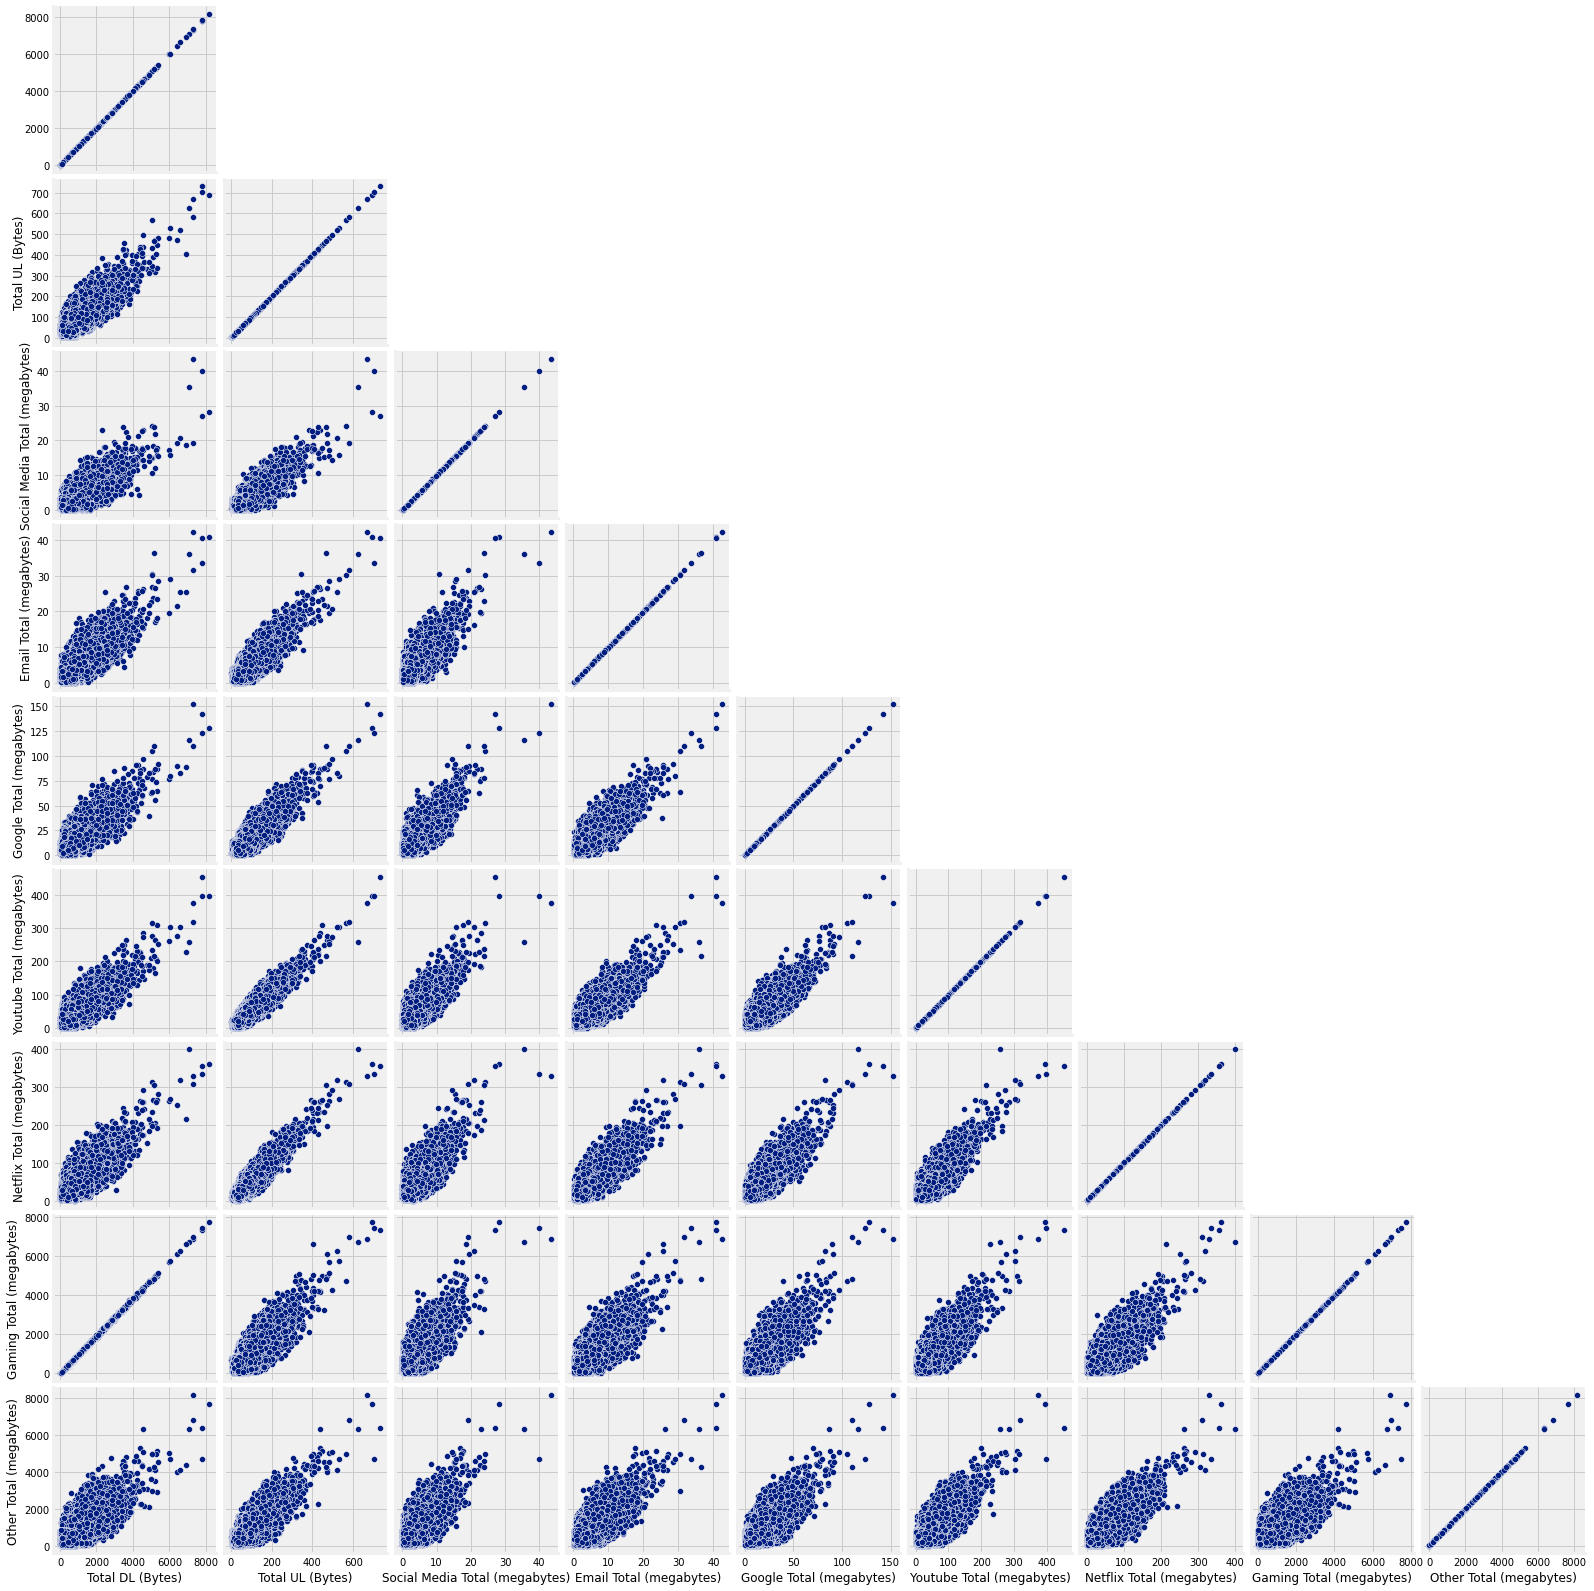

In [145]:
_=sns.pairplot(df_grouped_bytesdata[['Total DL (Bytes)','Total UL (Bytes)','Social Media Total (megabytes)','Email Total (megabytes)','Google Total (megabytes)',
                                     'Youtube Total (megabytes)','Netflix Total (megabytes)','Gaming Total (megabytes)',
                                     'Other Total (megabytes)']],diag_kind=None,markers=['s'],corner=True)

In [57]:
df_manfact=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung" \
                    or `Handset Manufacturer`=="Huawei"')

In [58]:
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str,rot=0,figsize:tuple=(8,5)) -> None:
    plt.figure(figsize=figsize)
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title)
    plt.xticks(fontsize=14,rotation=rot)
    plt.yticks(fontsize=14)
    plt.show()

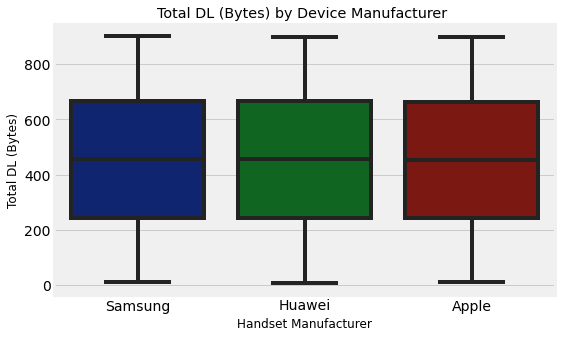

In [59]:
plot_box_multi(df_manfact,x_col="Handset Manufacturer",
               y_col="Total DL (Bytes)",title="Total DL (Bytes) by Device Manufacturer ")

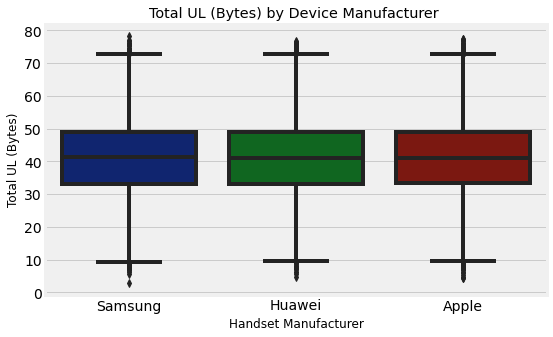

In [60]:
plot_box_multi(df_manfact,x_col="Handset Manufacturer",
               y_col="Total UL (Bytes)",title="Total UL (Bytes) by Device Manufacturer ")

### 6

In [61]:
# adding Decile rank column to the DataFrame
df_grouped_bytesdata['Decile_rank'] = pd.qcut(df_grouped_bytesdata['Dur. (s)'],10,labels = False)

In [62]:
decile_ranks=df_grouped_bytesdata.groupby(by='Decile_rank').agg({'Total Data (megabytes)':'sum'})

In [63]:
decile_ranks

,Total Data (megabytes)
Decile_rank,
0,5.437902e+06
1,6.111519e+06
2,6.534753e+06
3,6.030476e+06
4,5.195789e+06
5,6.373633e+06
6,6.148770e+06
7,7.806925e+06
8,9.273436e+06


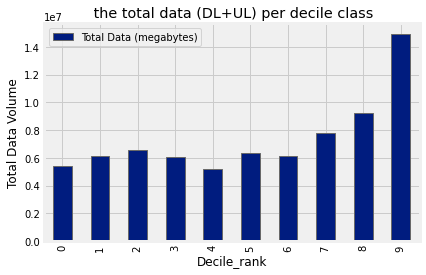

In [64]:
_=decile_ranks.plot(kind='bar',ylabel='Total Data Volume',title=' the total data (DL+UL) per decile class')

### 7

correlation Matrix between applications

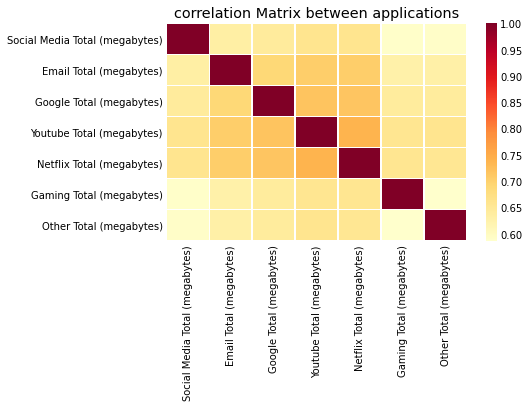

In [143]:
corr=df_grouped_bytesdata[['Social Media Total (megabytes)','Email Total (megabytes)','Google Total (megabytes)',
                                     'Youtube Total (megabytes)','Netflix Total (megabytes)','Gaming Total (megabytes)',
                                     'Other Total (megabytes)']].corr()

_ = sns.heatmap(corr, linewidths=.5, cmap='YlOrRd', cbar=True).set_title('correlation Matrix between applications')

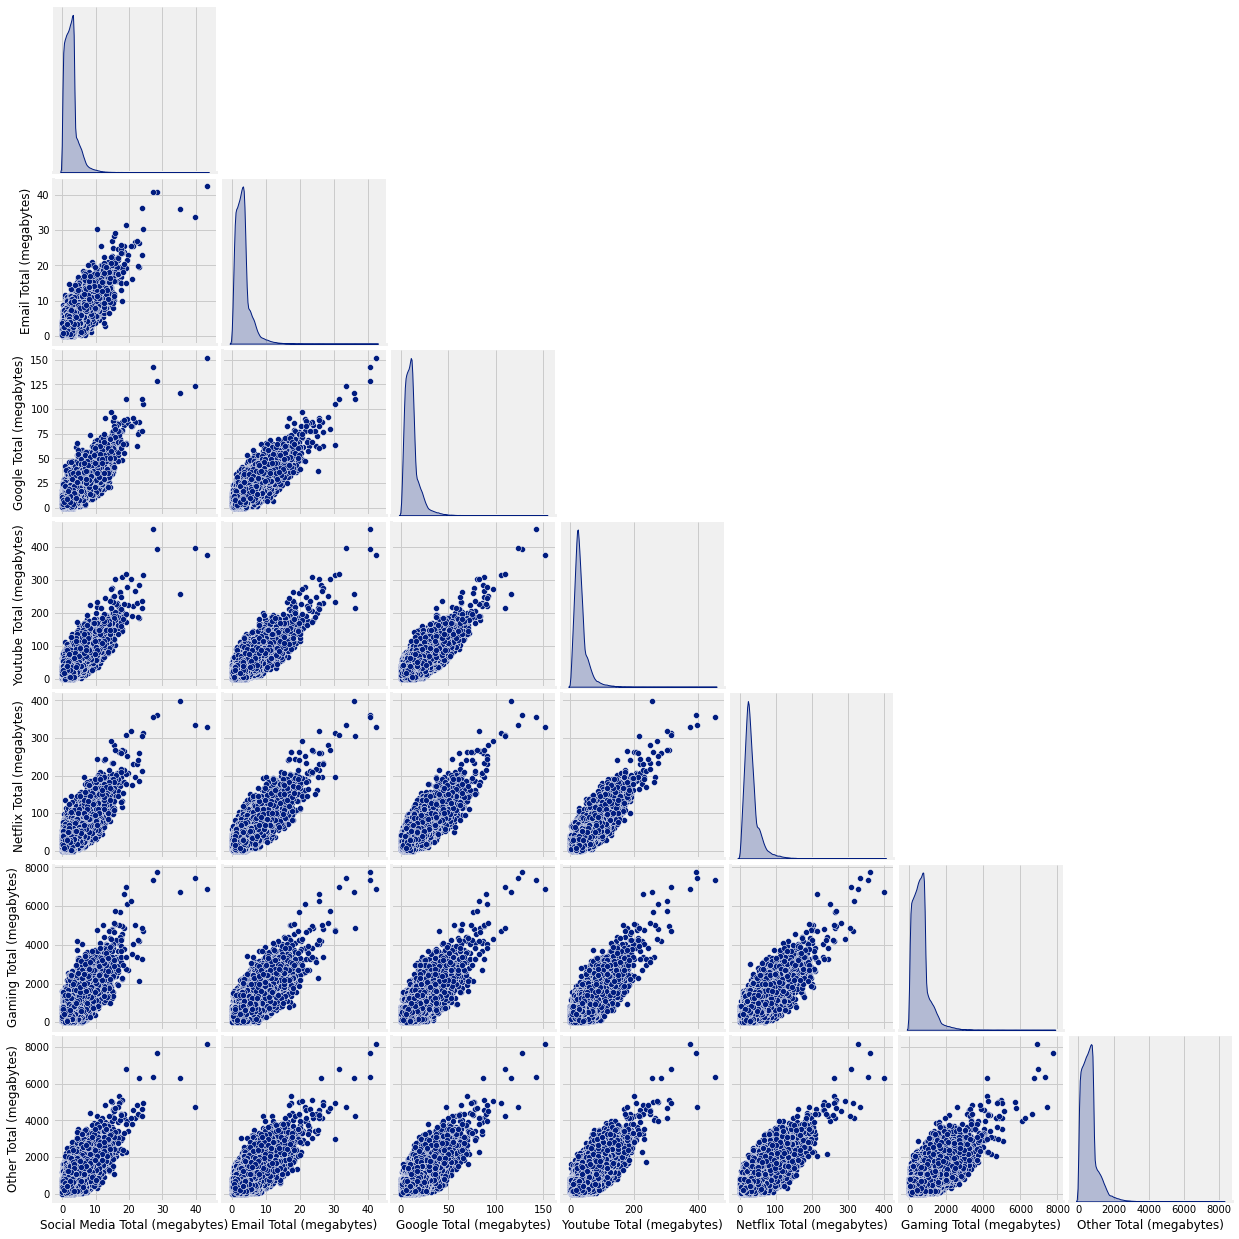

In [148]:
sns.pairplot(df_grouped_bytesdata[['Social Media Total (megabytes)','Email Total (megabytes)','Google Total (megabytes)',
                                     'Youtube Total (megabytes)','Netflix Total (megabytes)','Gaming Total (megabytes)',
                                     'Other Total (megabytes)']],diag_kind='kde',markers=['s'],corner=True)

**PCA**

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [67]:
df_pca=df_grouped_bytesdata.drop(['IMEI','IMSI','Handset Manufacturer'],axis=1)

The most important parameter is number of components, with PCA all we want is to minimize the number of features.\
In our case the dataset has 13 components.

In [68]:
scaler=StandardScaler()

In [69]:
df_pca_scaled=scaler.fit_transform(df_pca)

In [70]:
pca_model=PCA(random_state=42).fit(df_pca_scaled)

Without providing the n_components to pca, the model uses all aviable compontes. Next we shall study the percentage explained by how many compnents and then decidec an optimum number of n_components.

In [71]:
pca_model.explained_variance_ratio_*100

array([6.94153102e+01, 8.12711356e+00, 6.49056611e+00, 3.13796408e+00,
       2.98577403e+00, 2.49711179e+00, 2.32753674e+00, 2.01056600e+00,
       1.97355527e+00, 6.35723023e-01, 3.98203483e-01, 5.75755147e-04,
       1.03077725e-29])

From the above variance ratio, we see that first 3 components alone explained 83.9%, which is a huge improvement.\
Let us visually see the percentage explained depending on number of components

(0.0, 110.0)

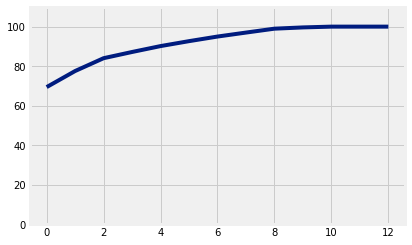

In [72]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_*100))
plt.ylim([0,110])

In [73]:
np.cumsum(pca_model.explained_variance_ratio_*100)

array([ 69.41531017,  77.54242372,  84.03298984,  87.17095392,
        90.15672795,  92.65383974,  94.98137647,  96.99194247,
        98.96549774,  99.60122076,  99.99942424, 100.        ,
       100.        ])

With 7 principal components , we shall have explained about 95%, That means we can safely remove 6 components.
If we would like to visualize our data, we can use 3-D scatter plot but that will explain 84.03% which is fair enough

In [74]:
pca_model3=PCA(n_components=3,random_state=42).fit(df_pca_scaled)
x_reduced=pca_model3.transform(df_pca_scaled)

In [77]:
df_pca

,xDR sessions,Dur. (s),Total UL (Bytes),Total DL (Bytes),Total Data (megabytes),Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes),Decile_rank
MSISDN/Number,,,,,,,,,,,,,
3197020876596,1,102.595596,37.295915,194.828056,232.123971,0.715224,1.520771,10.438660,11.959905,26.592300,178.048738,470.526473,4
33601001722,1,116.720000,36.053108,842.637466,878.690574,2.232135,1.331362,4.389005,21.624548,27.180981,812.458661,386.570872,5
33601001754,1,181.230000,36.104459,120.755184,156.859643,2.660565,3.307781,5.334863,12.432223,11.221763,119.750078,281.710071,7
33601002511,1,134.969000,39.306820,556.659663,595.966483,3.195623,3.205380,3.443126,21.333570,19.353900,538.827713,501.693672,6
33601007832,1,49.878000,20.327526,401.993172,422.320698,0.280294,2.284670,9.678493,6.977321,1.942092,391.126127,35.279702,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33789967113,1,160.461000,34.066711,174.056356,208.123067,1.413370,3.396607,9.892882,28.226479,30.370302,134.815919,408.107210,6
33789980299,2,210.389000,70.831420,1023.861966,1094.693386,4.250312,5.315327,10.246473,38.012812,51.950311,972.344996,1075.140407,8
33789996170,1,8.810000,26.716429,687.925212,714.641641,0.300183,1.006915,7.531269,26.647843,14.902538,660.361359,295.282817,0


Text(0.5, 0, 'Z Label')

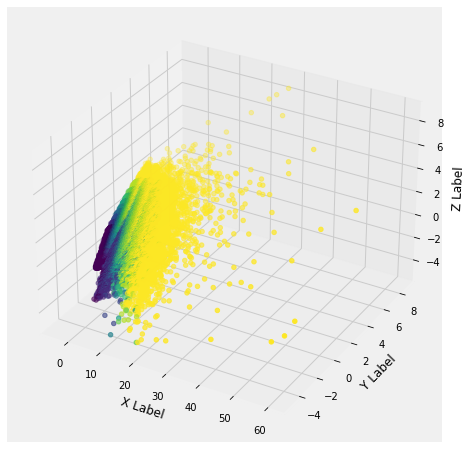

In [79]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 1],c=df_pca.Decile_rank)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## Task 2

In [83]:
df_second=df.copy()

In [84]:
print('Dataframe shape: '+ format(df_second.shape))
df_second.isna().sum()

Dataframe shape: (149008, 50)


Bearer Id                         429
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (s)                            0
IMSI                                0
MSISDN/Number                       0
IMEI                                0
Last Location Name                589
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Handset Manufacturer                0
Handset Type                        0
Nb of sec with Vol DL < 6250B       0
Nb of sec with Vol UL < 1250B       0
Social Media

### 1

In [85]:
users_metric=df_second.groupby(by='MSISDN/Number').agg({'Bearer Id':'count','Dur. (s)':'sum','Total Data (megabytes)':'sum'})
users_metric.columns=['Number of Sessions','Duration(s)','Total Data(megabytes)']

In [86]:
print("Top 10 customers with most sessions")
users_metric.sort_values(by='Number of Sessions',ascending=False).head(10)

Top 10 customers with most sessions


,Number of Sessions,Duration(s),Total Data(megabytes)
MSISDN/Number,,,
33626320676,18,4314.187575,7971.167261
33625779332,17,2719.119747,8499.620722
33614892860,17,3278.810363,8846.226494
33659725664,16,4035.428000,7705.862783
33675877202,15,3806.576192,7891.110608
33760536639,15,2764.221171,8514.773963
33667163239,13,2502.702767,5618.394054
33604515716,12,3390.981788,5487.855293
33627080969,12,3154.541788,5754.730859


In [87]:
print("Top 10 customers with long sessions")
users_metric.sort_values(by='Duration(s)',ascending=False).head(10)

Top 10 customers with long sessions


,Number of Sessions,Duration(s),Total Data(megabytes)
MSISDN/Number,,,
33626320676,18,4314.187575,7971.167261
33786323068,12,4059.652000,5622.231529
33659725664,16,4035.428000,7705.862783
33675877202,15,3806.576192,7891.110608
33761268199,10,3481.629000,5051.114473
33652131385,8,3393.253000,3038.073726
33604515716,12,3390.981788,5487.855293
33614892860,17,3278.810363,8846.226494
33675588018,8,3164.842000,2819.931163


In [88]:
print("Top 10 customers with large data usage")
users_metric.sort_values(by='Total Data(megabytes)',ascending=False).head(10)

Top 10 customers with large data usage


,Number of Sessions,Duration(s),Total Data(megabytes)
MSISDN/Number,,,
33614892860,17,3278.810363,8846.226494
33760536639,15,2764.221171,8514.773963
33625779332,17,2719.119747,8499.620722
33626320676,18,4314.187575,7971.167261
33675877202,15,3806.576192,7891.110608
33659725664,16,4035.428000,7705.862783
33666464084,11,2401.530384,7308.500938
33760413819,12,2951.633384,7132.370514
33664712899,11,2927.785000,6872.018208


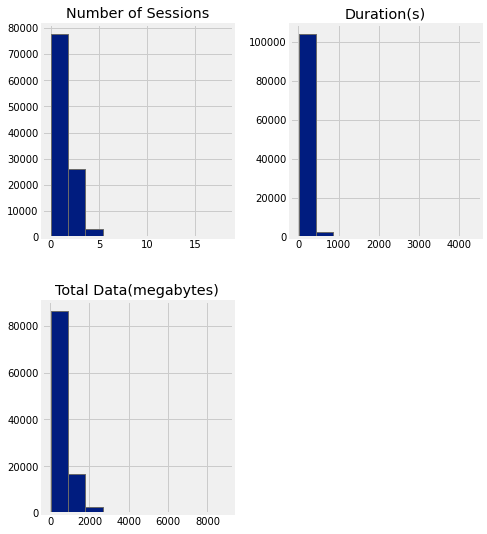

In [89]:
_=users_metric.hist(figsize=(7,9))

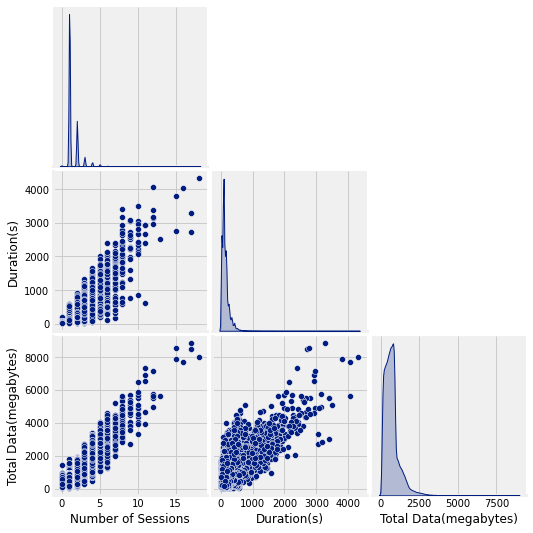

In [150]:
_=sns.pairplot(users_metric,diag_kind='kde',markers=['s'],corner=True)

In [151]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import sys

In [152]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)
    return normalized_data

In [153]:
def make_clusters_summary(df, cluster):
    df_dict = {}
    for n_cluster in range(0, len(cluster.cluster_centers_)):
        cluster_elements = (cluster.labels_ == n_cluster)

        df_use = df[cluster_elements]
        df_dict['cluster ' + str(n_cluster)] = df_use
    return df_dict

## 2

In [154]:
users_metric_scaled=normalizer(users_metric)

In [155]:
kmeans=KMeans(n_clusters=3,random_state=42).fit(users_metric_scaled)

In [156]:
kmeans.cluster_centers_

array([[0.00307035, 0.35693513, 0.92976201],
       [0.00197328, 0.12941266, 0.98958873],
       [0.00480612, 0.69856626, 0.6950178 ]])

In [157]:
clusters=make_clusters_summary(users_metric,kmeans)

In [158]:
print('___Summary Statistics for Cluster 1___')
clusters['cluster 0'].agg(['min','max','sum'])

___Summary Statistics for Cluster 1___


,Number of Sessions,Duration(s),Total Data(megabytes)
min,0,1.375500e+01,4.259776e+01
max,18,4.314188e+03,8.846226e+03
sum,41193,6.004582e+06,1.613774e+07


In [159]:
print('___Summary Statistics for Cluster 2___')
clusters['cluster 1'].agg(['min','max','sum'])

___Summary Statistics for Cluster 2___


,Number of Sessions,Duration(s),Total Data(megabytes)
min,0,7.142000e+00,5.287081e+01
max,11,8.875920e+02,5.096129e+03
sum,96608,7.325422e+06,5.568835e+07


In [160]:
print('___Summary Statistics for Cluster 3___')
clusters['cluster 2'].agg(['min','max','sum'])

___Summary Statistics for Cluster 3___


,Number of Sessions,Duration(s),Total Data(megabytes)
min,0,3.837100e+01,3.324901e+01
max,12,4.059652e+03,5.622232e+03
sum,10778,1.957560e+06,2.044399e+06


## 3

In [101]:
users_and_apps=df_second.groupby(by='MSISDN/Number').agg({'Social Media Total (megabytes)': 'sum',
                                                          'Email Total (megabytes)': 'sum',
                                                          'Google Total (megabytes)': 'sum',
                                                          'Youtube Total (megabytes)': 'sum',
                                                          'Netflix Total (megabytes)': 'sum',
                                                          'Gaming Total (megabytes)': 'sum'})

In [102]:
def findtopten(df,sort_col):
    try:
        df_sorted=df.sort_values(by=sort_col,ascending=False)[sort_col].head(10)
        
    except:
        print('Enter the right name of the column')
    return df_sorted

In [103]:
findtopten(users_and_apps,'Social Media Total (megabytes)')

MSISDN/Number
33626320676    43.374779
33760536639    39.783189
33659725664    35.412358
33614892860    28.294544
33625779332    27.135500
33667163239    24.247850
33786323068    23.974919
33669068942    23.800834
33603127838    23.077825
33658490784    23.000066
Name: Social Media Total (megabytes), dtype: float64

In [104]:
findtopten(users_and_apps,'Email Total (megabytes)')

MSISDN/Number
33626320676    42.418782
33614892860    40.788634
33625779332    40.633966
33786323068    36.310123
33659725664    35.999792
33760536639    33.693767
33675877202    31.514421
33665460546    30.417885
33667163239    30.335796
33698792269    29.059042
Name: Email Total (megabytes), dtype: float64

In [105]:
findtopten(users_and_apps,'Youtube Total (megabytes)')

MSISDN/Number
33625779332    452.958769
33760536639    396.289198
33614892860    394.370218
33626320676    374.483047
33675877202    317.410572
33667163239    315.231310
33627080969    308.790774
33760413819    303.169107
33698792269    302.661958
33603127838    284.090139
Name: Youtube Total (megabytes), dtype: float64

In [106]:
findtopten(users_and_apps,'Google Total (megabytes)')

MSISDN/Number
33626320676    152.191852
33625779332    142.307915
33614892860    127.973787
33760536639    123.223099
33659725664    116.516345
33786323068    110.254484
33675877202    109.860502
33667163239    105.032696
33761268199     97.089988
33698756430     91.935151
Name: Google Total (megabytes), dtype: float64

In [107]:
findtopten(users_and_apps,'Netflix Total (megabytes)')

MSISDN/Number
33659725664    399.519079
33614892860    361.401046
33625779332    356.980607
33760536639    334.643269
33626320676    328.725740
33760413819    318.347546
33667163239    313.939488
33675877202    309.093159
33786323068    305.939790
33761268199    292.091341
Name: Netflix Total (megabytes), dtype: float64

In [108]:
findtopten(users_and_apps,'Gaming Total (megabytes)')

MSISDN/Number
33614892860    7749.432234
33760536639    7461.045228
33625779332    7326.673487
33675877202    6970.567597
33626320676    6887.572116
33659725664    6725.559211
33666464084    6646.303338
33760413819    6268.619592
33664712899    6103.856008
33698792269    5753.743069
Name: Gaming Total (megabytes), dtype: float64

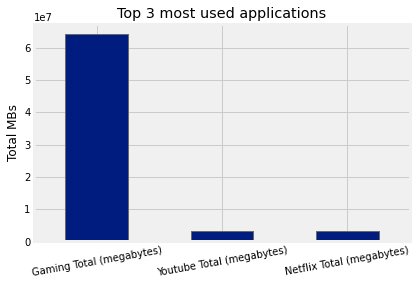

In [142]:
_=users_and_apps.agg('sum').sort_values(ascending=False)[:3].plot(kind='bar',rot=10,ylabel='Total MBs')
_=plt.title('Top 3 most used applications')

In [110]:
def elbow_method(dataframe, min_k, max_k):
    # Try all k's between min_k and max_k
    cluster_nums = range(min_k, max_k + 1)
    
    # Array of K-means algorithm objects
    k_mean_algs = [KMeans(n_clusters = k) for k in cluster_nums]
    
    # Array with the results of the K-mean algorithms
    k_mean_res = [alg.fit(dataframe) for alg in k_mean_algs]
    
    # Array with the centroids for each value of k
    centroids = [res.cluster_centers_ for res in k_mean_res]
    
    # Euclidean distance between the points of the cluster and the centroids
    distances = [cdist(dataframe, centroid, 'euclidean') for centroid in centroids]
    
    # Get the closest centroid (and the corresponding distance)
    min_indices = [np.argmin(distance, axis = 1) for distance in distances]
    min_distances = [np.min(distance, axis = 1) for distance in distances]
    
    # Calculate the average squared distance
    avg_sum_squares = [sum(dist ** 2) / dataframe.shape[0] for dist in min_distances]

    # Plot the elbow graph
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(cluster_nums, avg_sum_squares, 'b*-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Average sum of squares within cluster')

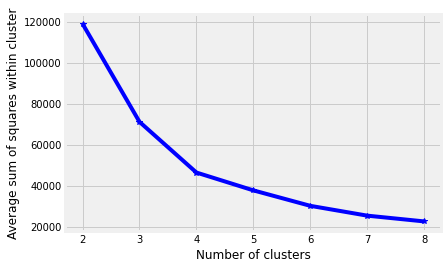

In [76]:
elbow_method(users_metric,2,8)

## Task 3

Because the 'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)' columns were removed due to >58% of missing values,\
We can not bring them back since the data changed and other treatment already made. Using the current MSISDN/Number, \
we can check the correponding values in orginal dataframe and merge them and impute those missing values if it need be


## 1

In [111]:
expe_df=df_second.groupby(by='MSISDN/Number').agg({'Avg RTT DL (ms)':'mean','Avg RTT UL (ms)':'mean',
                                                   'Avg Bearer TP DL (kbps)':'mean',
                                                   'Avg Bearer TP UL (kbps)':'mean',
                                                   'Handset Manufacturer':'unique'})

In [112]:
# 6 users had more than o1 mobile devices, some defined and others undefined. For simplicity purpose,
# since these are only 6 usersers, I considered the first devices

In [113]:
expe_df['Handset Manufacturer'] = expe_df['Handset Manufacturer'].apply(lambda x: x[0])

In [114]:
tcp_data=df_original.groupby(by='MSISDN/Number',as_index=True).aggregate({'TCP DL Retrans. Vol (Bytes)':'mean',
                                                                          'TCP UL Retrans. Vol (Bytes)':'mean'})

In [115]:
#As this new data was not processed, let us fix outliers before
tcp_data=outlier_remove(tcp_data,cols_use=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])

In [116]:
expe_df=expe_df.merge(tcp_data,how='left',left_index=True,right_index=True)

In [117]:
#Create a new class instance with new dataframe
cleaner2=clean_df.CleanDataframe(expe_df)

In [118]:
#Fix the missing values either by mean or median based on skewness
expe_df=cleaner2.fill_missing_values(cols_numeric=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])

## 2

In [119]:
for col in expe_df.columns.difference(['Handset Manufacturer']):
    print('Top 10 users with most '+str(col))
    print(expe_df.sort_values(by=col,ascending=False)[col].head(10),'\n')

Top 10 users with most Avg Bearer TP DL (kbps)
MSISDN/Number
33763740889    156392.0
33762524197    155913.0
33651354886    155539.0
33763054014    155490.0
33663100403    155041.0
33651556228    154872.0
33667102539    154842.0
33668474679    154439.0
33658299552    153917.0
33661737821    153577.0
Name: Avg Bearer TP DL (kbps), dtype: float64 

Top 10 users with most Avg Bearer TP UL (kbps)
MSISDN/Number
33666953377    26395.0
33683111590    26392.0
33627891985    26391.0
33763624567    26381.0
33763959742    26368.0
33661734928    26296.0
33675667468    26285.0
33660924267    26250.0
33698059432    26247.0
33699684931    26155.0
Name: Avg Bearer TP UL (kbps), dtype: float64 

Top 10 users with most Avg RTT DL (ms)
MSISDN/Number
33647787535    525.0
33613353297    525.0
33689490152    525.0
33666763969    525.0
33659122963    525.0
33668917376    525.0
33762472203    525.0
33676453145    525.0
33607136893    524.0
33760390244    524.0
Name: Avg RTT DL (ms), dtype: float64 

Top 10 us

In [120]:
for col in expe_df.columns.difference(['Handset Manufacturer']):
    print('Bottom 10 users with most '+str(col))
    print(expe_df.sort_values(by=col)[col].head(10),'\n')

Bottom 10 users with most Avg Bearer TP DL (kbps)
MSISDN/Number
33664684565    0.0
33661916448    0.0
33661995153    0.0
33662075089    0.0
33662203388    0.0
33662244588    0.0
33662298430    0.0
33662321955    0.0
33662347748    0.0
33662459797    0.0
Name: Avg Bearer TP DL (kbps), dtype: float64 

Bottom 10 users with most Avg Bearer TP UL (kbps)
MSISDN/Number
3197020876596    0.0
33659127564      0.0
33659136463      0.0
33659304452      0.0
33659337161      0.0
33659351817      0.0
33659460106      0.0
33659471143      0.0
33659649028      0.0
33659782928      0.0
Name: Avg Bearer TP UL (kbps), dtype: float64 

Bottom 10 users with most Avg RTT DL (ms)
MSISDN/Number
33661575382    0.0
33652982188    0.0
33667477967    0.0
33660637039    0.0
33699538565    0.0
33762753209    0.0
33660204450    2.0
33695045499    4.0
33659493541    5.0
33788060063    5.0
Name: Avg RTT DL (ms), dtype: float64 

Bottom 10 users with most Avg RTT UL (ms)
MSISDN/Number
33622415130    0.0
33782518557    

In [121]:
for col in expe_df.columns.difference(['Handset Manufacturer']):
    print('Most frequent values in '+str(col))
    print(expe_df[col].value_counts(sort=True,ascending=False).head(10),'\n')

Most frequent values in Avg Bearer TP DL (kbps)
23.0    4108
6.0     3058
43.0    2485
44.0    2087
22.0    1824
63.0    1633
48.0    1600
42.0    1575
47.0    1331
45.0    1145
Name: Avg Bearer TP DL (kbps), dtype: int64 

Most frequent values in Avg Bearer TP UL (kbps)
40.0    4149
54.0    3694
47.0    3457
9.0     2916
53.0    2760
51.0    2250
52.0    2195
44.0    2019
46.0    1982
48.0    1782
Name: Avg Bearer TP UL (kbps), dtype: int64 

Most frequent values in Avg RTT DL (ms)
45.000000    19834
28.000000     2283
60.971908     2209
27.000000     2014
34.000000     1894
37.000000     1726
38.000000     1721
35.000000     1716
36.000000     1618
29.000000     1549
Name: Avg RTT DL (ms), dtype: int64 

Most frequent values in Avg RTT UL (ms)
5.0    27327
2.0     9329
1.0     8411
4.0     6512
3.0     5281
6.0     4739
7.0     2849
0.0     2402
8.0     2129
9.0     1763
Name: Avg RTT UL (ms), dtype: int64 

Most frequent values in TCP DL Retrans. Vol (Bytes)
3.911106e+06    59488
1.

In [122]:
devices_top=expe_df["Handset Manufacturer"].value_counts(sort=True,ascending=False)[:30]

In [123]:
devices_top

Apple                                     42592
Samsung                                   30780
Huawei                                    21692
Undefined                                  6669
Sony mobile communications ab               949
Wiko global sasu                            715
Xiaomi communications co ltd                374
Oneplus technology (shenzhen) co ltd        297
Asustek                                     287
Tcl communication ltd                       255
Lenovo                                      225
Crosscall                                   193
Zte                                         185
Microsoft mobile oy                         182
Lg                                          167
Htc                                         154
Hmd global oy                               134
Nokia                                       108
Archos sa                                    53
Tp-link technologies co ltd                  53
Rim                                     

In [124]:
devices_top=devices_top.to_dict()

In [125]:
devices_top.pop('Undefined')

6669

In [126]:
devices_df=expe_df[expe_df['Handset Manufacturer'].apply(lambda x: True if x in devices_top.keys() else False)]

In [127]:
expe_df

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Manufacturer,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
MSISDN/Number,,,,,,,
3197020876596,45.0,5.0,1.000000,0.0,Quectel wireless solutions co ltd,3.911106e+06,87263.294378
33601001722,46.0,0.0,37.000000,39.0,Huawei,3.911106e+06,87263.294378
33601001754,30.0,1.0,48.000000,51.0,Apple,3.911106e+06,87263.294378
33601002511,45.0,5.0,48.000000,49.0,Undefined,3.911106e+06,87263.294378
33601007832,69.0,15.0,204.000000,44.0,Apple,1.066000e+03,87263.294378
...,...,...,...,...,...,...,...
33789967113,48.0,5.0,23.000000,44.0,Apple,3.911106e+06,87263.294378
33789980299,51.5,8.0,6514.037221,2644.5,Undefined,1.380000e+02,9958.000000
33789996170,42.0,10.0,9978.000000,387.0,Huawei,2.150440e+05,3001.000000


As we can see above, there are over 150 different manufacturers and it would not be easy to read and get any useful information, Also we can remove the least used type to account for bias. For example if we consider the distribution of a single user with one frequent type(i.e. nokia) the findings can not be generalized since it is for one user. Therefore we shall consider the top 30 with at least 30 occurences 

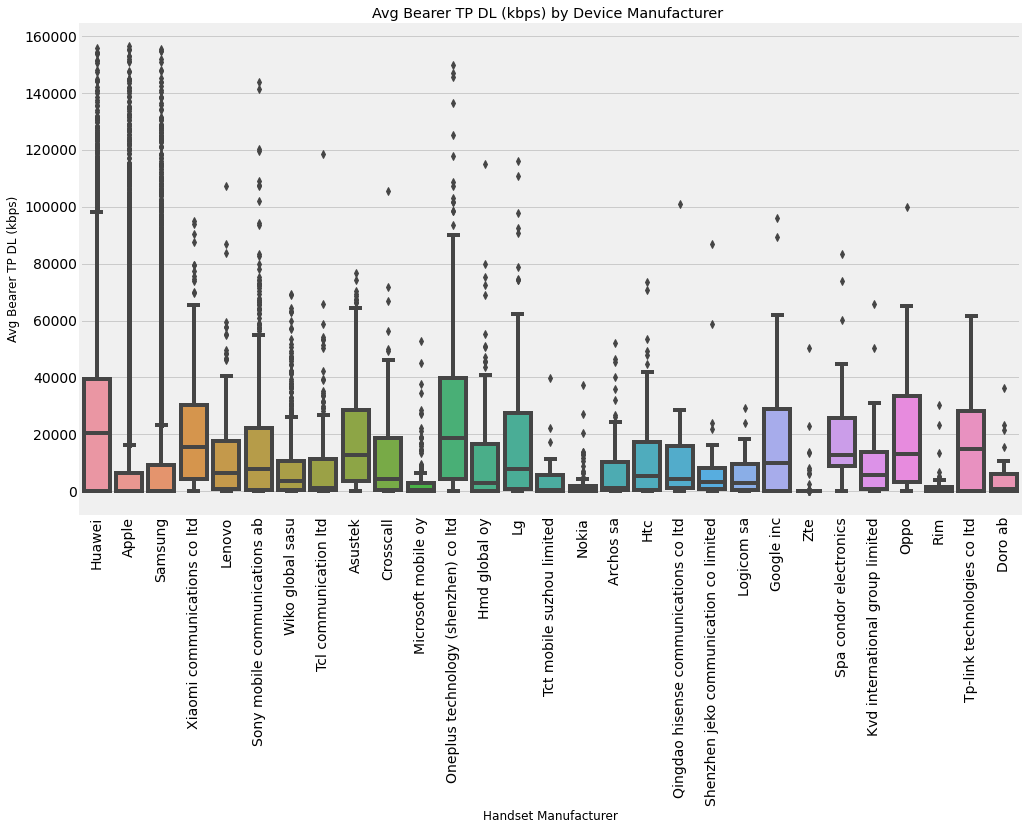

In [128]:
plot_box_multi(devices_df,x_col='Handset Manufacturer',y_col='Avg Bearer TP DL (kbps)',
               rot=90,figsize=(15,9), title='Avg Bearer TP DL (kbps) by Device Manufacturer ')

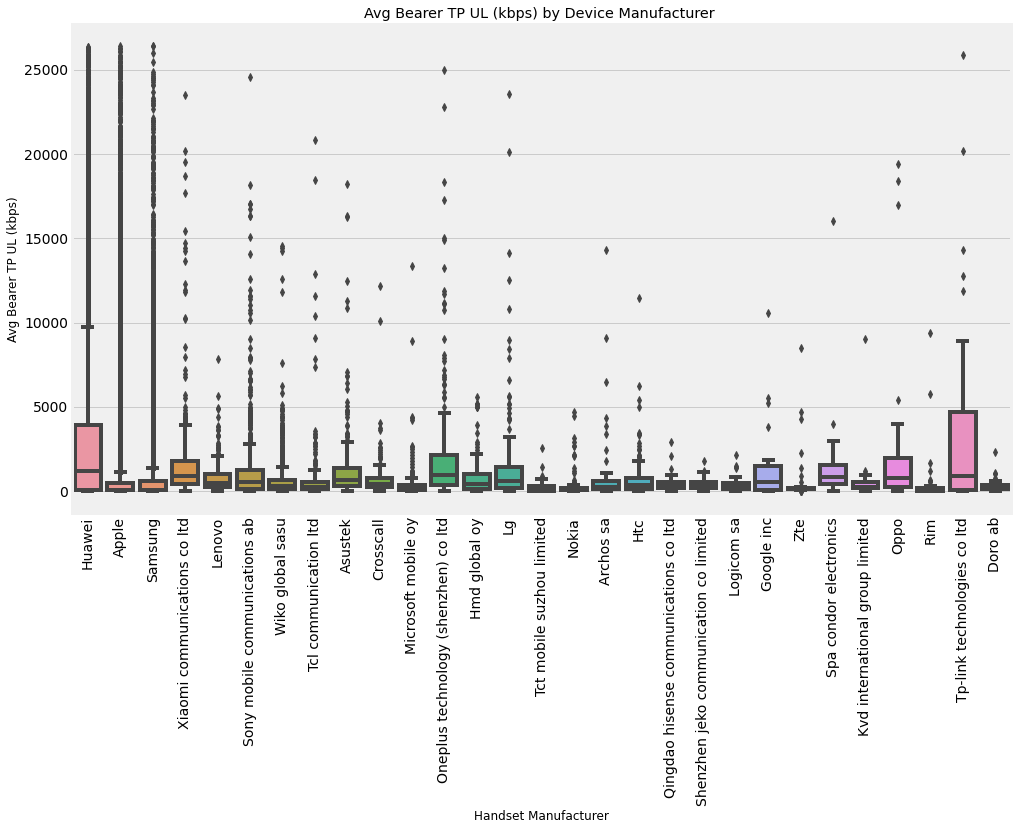

In [129]:
plot_box_multi(devices_df,x_col='Handset Manufacturer',y_col='Avg Bearer TP UL (kbps)',
               rot=90,figsize=(15,9), title='Avg Bearer TP UL (kbps) by Device Manufacturer ')

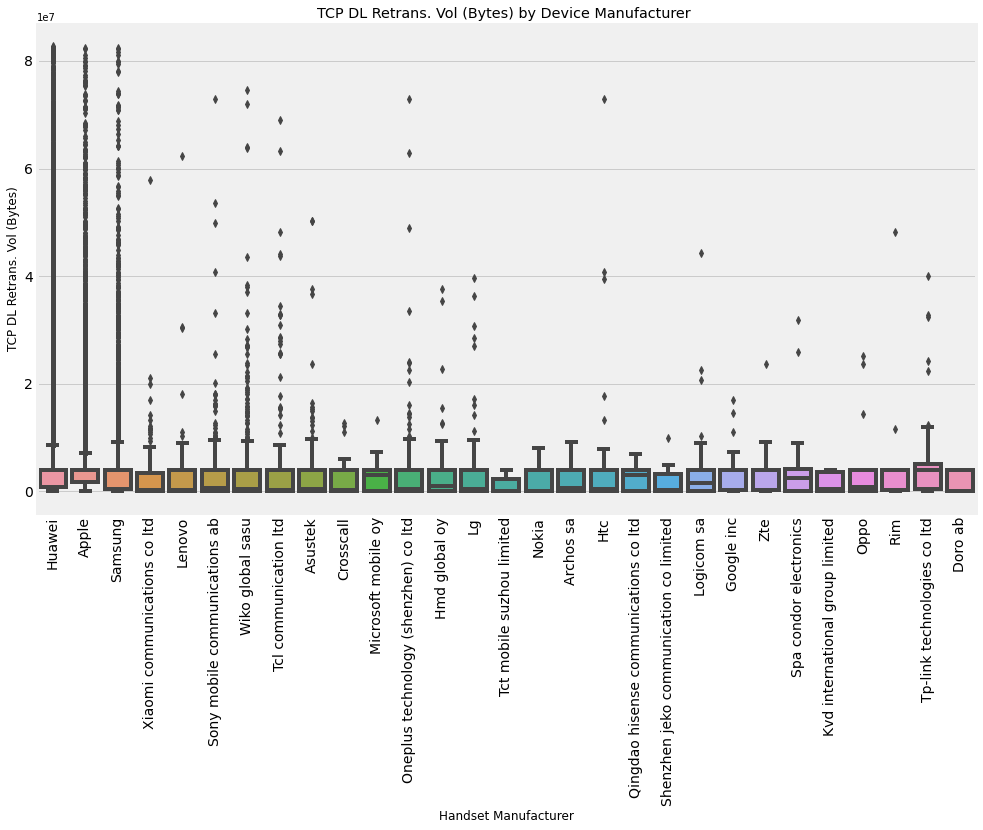

In [130]:
plot_box_multi(devices_df,x_col='Handset Manufacturer',y_col='TCP DL Retrans. Vol (Bytes)',
               rot=90,figsize=(15,9), title='TCP DL Retrans. Vol (Bytes) by Device Manufacturer ')

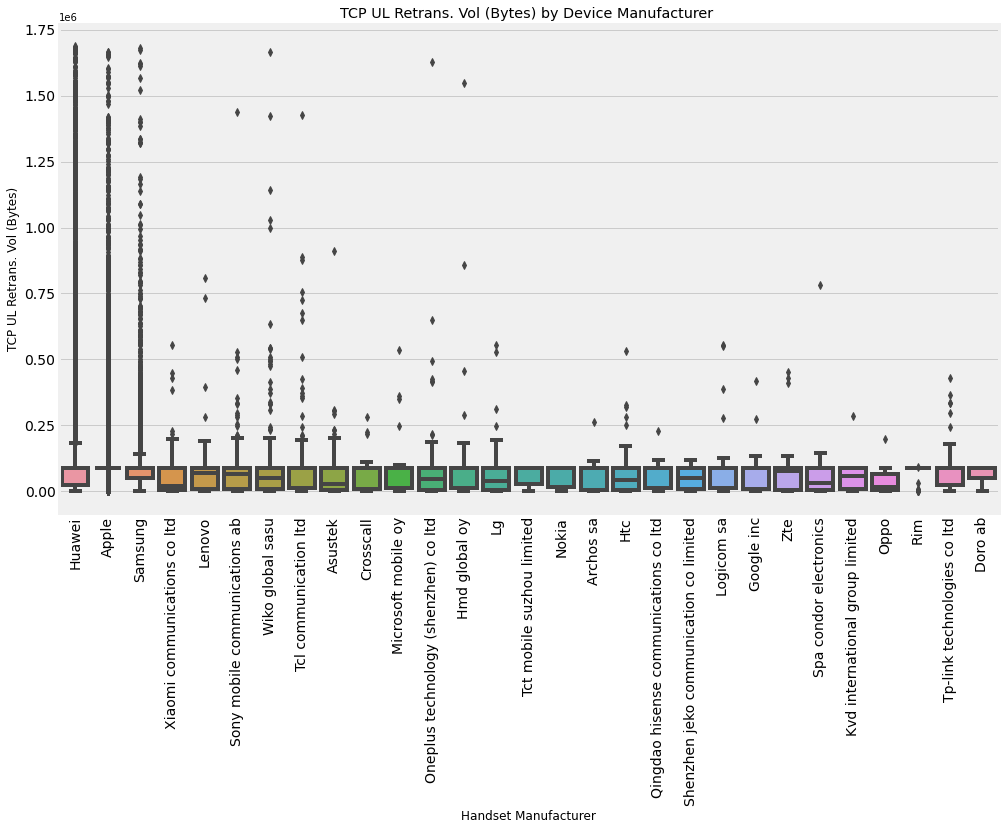

In [131]:
plot_box_multi(devices_df,x_col='Handset Manufacturer',y_col='TCP UL Retrans. Vol (Bytes)',
               rot=90,figsize=(15,9), title='TCP UL Retrans. Vol (Bytes) by Device Manufacturer ')

In [132]:
devices_df

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Manufacturer,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
MSISDN/Number,,,,,,,
33601001722,46.0,0.0,37.0,39.0,Huawei,3.911106e+06,87263.294378
33601001754,30.0,1.0,48.0,51.0,Apple,3.911106e+06,87263.294378
33601007832,69.0,15.0,204.0,44.0,Apple,1.066000e+03,87263.294378
33601008617,57.0,2.5,20197.5,8224.5,Apple,9.349630e+06,21202.000000
33601010682,33.0,4.0,3761.0,193.0,Samsung,2.760000e+03,87263.294378
...,...,...,...,...,...,...,...
33789955678,53.0,4.0,42.0,47.0,Apple,3.911106e+06,87263.294378
33789960306,45.0,5.0,41.0,65.0,Samsung,3.911106e+06,87263.294378
33789967113,48.0,5.0,23.0,44.0,Apple,3.911106e+06,87263.294378


In [133]:
expe_df_model=devices_df.drop(['Handset Manufacturer'],axis=1)
expe_df_model_norm=normalizer(expe_df_model)

In [134]:
cluster_expe=KMeans(n_clusters=3).fit(expe_df_model_norm)

In [135]:
cluster_expe.inertia_

2273.72906271092

In [136]:
expe_clusters=make_clusters_summary(devices_df,cluster_expe)

<AxesSubplot:>

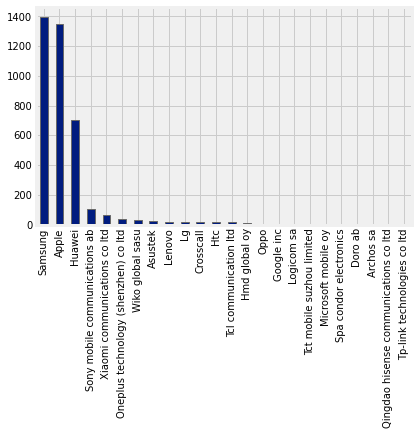

In [141]:
# What are manufacturers are in which cluster
expe_clusters['cluster 0']['Handset Manufacturer'].value_counts().plot(kind='bar')

### Task 4

In [68]:
from sklearn.metrics.pairwise import euclidean_distances

In [89]:
euclidean_distances(users_metric,kmeans.cluster_centers_)

array([[252.7933937 , 252.83080792, 252.87023439],
       [885.44079407, 885.41141886, 885.62868077],
       [238.8099396 , 238.94328325, 238.70479497],
       ...,
       [713.76263168, 713.70554177, 713.99339391],
       [499.58077201, 499.58746939, 499.71000635],
       [171.92899619, 172.01634076, 171.91505689]])